In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [2]:
# Cell 2: Load Data
beneficiary_df = pd.read_csv('../data/raw/Train_Beneficiarydata-1542865627584.csv')
inpatient_df = pd.read_csv('../data/raw/Train_Inpatientdata-1542865627584.csv')
outpatient_df = pd.read_csv('../data/raw/Train_Outpatientdata-1542865627584.csv')
labels_df = pd.read_csv('../data/raw/Train-1542865627584.csv')

print("Dataset Shapes:")
print(f"Beneficiary Data: {beneficiary_df.shape}")
print(f"Inpatient Data: {inpatient_df.shape}")
print(f"Outpatient Data: {outpatient_df.shape}")
print(f"Labels Data: {labels_df.shape}")


Dataset Shapes:
Beneficiary Data: (138556, 25)
Inpatient Data: (40474, 30)
Outpatient Data: (517737, 27)
Labels Data: (5410, 2)


In [3]:
# Cell 3: Initial Data Exploration
print("\nBeneficiary Data Sample:")
display(beneficiary_df.head())

print("\nInpatient Data Sample:")
display(inpatient_df.head())

print("\nLabels Distribution:")
print(labels_df['PotentialFraud'].value_counts())
print("\nLabels Percentage:")
print(labels_df['PotentialFraud'].value_counts(normalize=True))



Beneficiary Data Sample:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200



Inpatient Data Sample:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN



Labels Distribution:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Labels Percentage:
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


In [5]:
# Cell 4: Data Quality Assessment Function
def check_data_quality(df, df_name):
    """Comprehensive data quality check"""
    print(f"\n=== Data Quality Report for {df_name} ===")
    print(f"Shape: {df.shape}")
    
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Percentage': missing_pct
    }).sort_values('Missing Count', ascending=False)
    
    display(missing_df[missing_df['Missing Count'] > 0].head(10))
    
    print(f"\nData Types:")
    print(df.dtypes.value_counts())
    
    print(f"\nDuplicate Rows: {df.duplicated().sum()}")
    
    return missing_df


In [6]:
# Cell 5: Check Quality for Each Dataset
beneficiary_missing = check_data_quality(beneficiary_df, "Beneficiary")
inpatient_missing = check_data_quality(inpatient_df, "Inpatient")
outpatient_missing = check_data_quality(outpatient_df, "Outpatient")
labels_missing = check_data_quality(labels_df, "Labels")


=== Data Quality Report for Beneficiary ===
Shape: (138556, 25)

Missing Values:


,Missing Count,Percentage
DOD,137135,98.974422



Data Types:
int64     21
object     4
Name: count, dtype: int64

Duplicate Rows: 0

=== Data Quality Report for Inpatient ===
Shape: (40474, 30)

Missing Values:


,Missing Count,Percentage
ClmProcedureCode_6,40474,100.000000
ClmProcedureCode_5,40465,99.977764
ClmProcedureCode_4,40358,99.713396
ClmProcedureCode_3,39509,97.615753
ClmDiagnosisCode_10,36547,90.297475
OtherPhysician,35784,88.412314
ClmProcedureCode_2,35020,86.524683
ClmProcedureCode_1,17326,42.807728
OperatingPhysician,16644,41.122696
ClmDiagnosisCode_9,13497,33.347334



Data Types:
object     22
float64     7
int64       1
Name: count, dtype: int64

Duplicate Rows: 0

=== Data Quality Report for Outpatient ===
Shape: (517737, 27)

Missing Values:


,Missing Count,Percentage
ClmProcedureCode_5,517737,100.000000
ClmProcedureCode_6,517737,100.000000
ClmProcedureCode_4,517735,99.999614
ClmProcedureCode_3,517733,99.999227
ClmProcedureCode_2,517701,99.993047
ClmProcedureCode_1,517575,99.968710
ClmDiagnosisCode_10,516654,99.790820
ClmDiagnosisCode_9,502899,97.134066
ClmDiagnosisCode_8,494825,95.574587
ClmDiagnosisCode_7,484776,93.633640



Data Types:
object     19
float64     6
int64       2
Name: count, dtype: int64

Duplicate Rows: 0

=== Data Quality Report for Labels ===
Shape: (5410, 2)

Missing Values:


,Missing Count,Percentage



Data Types:
object    2
Name: count, dtype: int64

Duplicate Rows: 0


In [7]:
# Cell 6: Preprocess Beneficiary Data
def preprocess_beneficiary_data(df):
    """Preprocess beneficiary dataset"""
    df_processed = df.copy()
    
    # Convert date columns
    df_processed['DOB'] = pd.to_datetime(df_processed['DOB'], errors='coerce')
    df_processed['DOD'] = pd.to_datetime(df_processed['DOD'], errors='coerce')
    
    # Calculate age at first claim (assuming 2009 as reference year)
    reference_year = 2009
    df_processed['Age'] = reference_year - df_processed['DOB'].dt.year
    
    # Create binary flag for deceased
    df_processed['IsDeceased'] = df_processed['DOD'].notna().astype(int)
    
    # Calculate coverage ratios
    df_processed['PartA_Coverage_Ratio'] = df_processed['NoOfMonths_PartACov'] / 12
    df_processed['PartB_Coverage_Ratio'] = df_processed['NoOfMonths_PartBCov'] / 12
    
    # Sum chronic conditions
    chronic_cols = [col for col in df.columns if 'ChronicCond_' in col]
    df_processed['TotalChronicConditions'] = df_processed[chronic_cols].sum(axis=1)
    
    # Calculate total annual amounts
    df_processed['TotalAnnualReimbursement'] = df_processed['IPAnnualReimbursementAmt'] + df_processed['OPAnnualReimbursementAmt']
    df_processed['TotalAnnualDeductible'] = df_processed['IPAnnualDeductibleAmt'] + df_processed['OPAnnualDeductibleAmt']
    
    return df_processed

beneficiary_processed = preprocess_beneficiary_data(beneficiary_df)
print("Beneficiary features created successfully!")
print(f"Processed shape: {beneficiary_processed.shape}")


Beneficiary features created successfully!
Processed shape: (138556, 32)


In [8]:
# Cell 7: Preprocess Claims Data
def preprocess_claims_data(inpatient_df, outpatient_df):
    """Preprocess and combine inpatient/outpatient claims"""
    
    # Add claim type identifier
    inpatient_df['ClaimType'] = 'Inpatient'
    outpatient_df['ClaimType'] = 'Outpatient'
    
    # Standardize column names
    common_cols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 
                   'InscClaimAmtReimbursed', 'AttendingPhysician', 'DeductibleAmtPaid']
    
    # Select relevant columns
    inpatient_selected = inpatient_df[common_cols + ['ClaimType']].copy()
    outpatient_selected = outpatient_df[common_cols + ['ClaimType']].copy()
    
    # Combine claims
    claims_combined = pd.concat([inpatient_selected, outpatient_selected], ignore_index=True)
    
    # Convert date columns
    claims_combined['ClaimStartDt'] = pd.to_datetime(claims_combined['ClaimStartDt'], errors='coerce')
    claims_combined['ClaimEndDt'] = pd.to_datetime(claims_combined['ClaimEndDt'], errors='coerce')
    
    # Calculate claim duration
    claims_combined['ClaimDuration'] = (claims_combined['ClaimEndDt'] - claims_combined['ClaimStartDt']).dt.days + 1
    
    # Extract time features
    claims_combined['ClaimMonth'] = claims_combined['ClaimStartDt'].dt.month
    claims_combined['ClaimYear'] = claims_combined['ClaimStartDt'].dt.year
    
    # Calculate reimbursement metrics
    claims_combined['ReimbursementPerDay'] = claims_combined['InscClaimAmtReimbursed'] / claims_combined['ClaimDuration'].replace(0, 1)
    
    # Create binary flags
    claims_combined['IsWeekendClaim'] = claims_combined['ClaimStartDt'].dt.dayofweek >= 5
    claims_combined['IsHighCostClaim'] = claims_combined['InscClaimAmtReimbursed'] > claims_combined['InscClaimAmtReimbursed'].quantile(0.75)
    
    return claims_combined

claims_combined = preprocess_claims_data(inpatient_df, outpatient_df)
print(f"Combined claims shape: {claims_combined.shape}")
print(f"Unique providers in claims: {claims_combined['Provider'].nunique()}")


Combined claims shape: (558211, 15)
Unique providers in claims: 5410


In [9]:
# Cell 8: Aggregate to Provider Level
def aggregate_to_provider_level(claims_df, beneficiary_df, labels_df):
    """Aggregate all data to provider level for modeling"""
    
    # 1. Claims aggregation by provider
    claims_agg = claims_df.groupby('Provider').agg({
        'InscClaimAmtReimbursed': ['count', 'sum', 'mean', 'std', 'max', 'min'],
        'DeductibleAmtPaid': ['sum', 'mean', 'std'],
        'ClaimDuration': ['mean', 'std', 'max'],
        'ReimbursementPerDay': ['mean', 'std'],
        'ClaimType': lambda x: (x == 'Inpatient').sum() / len(x) if len(x) > 0 else 0,
        'IsWeekendClaim': 'mean',
        'IsHighCostClaim': 'mean'
    }).reset_index()
    
    # Flatten column names
    claims_agg.columns = ['Provider'] + [
        f'Claims_{col[0]}_{col[1]}' if col[1] != '' else f'Claims_{col[0]}' 
        for col in claims_agg.columns[1:]
    ]
    
    # 2. Beneficiary aggregation by provider
    provider_beneficiary = claims_df[['Provider', 'BeneID']].drop_duplicates()
    provider_beneficiary = provider_beneficiary.merge(beneficiary_df, on='BeneID', how='left')
    
    beneficiary_agg = provider_beneficiary.groupby('Provider').agg({
        'Age': ['mean', 'std', 'min', 'max'],
        'TotalChronicConditions': ['mean', 'sum', 'std'],
        'TotalAnnualReimbursement': ['mean', 'sum'],
        'TotalAnnualDeductible': ['mean', 'sum'],
        'IsDeceased': 'mean',
        'Gender': lambda x: (x == 1).mean(),
        'Race': 'nunique'
    }).reset_index()
    
    beneficiary_agg.columns = ['Provider'] + [
        f'Beneficiary_{col[0]}_{col[1]}' if col[1] != '' else f'Beneficiary_{col[0]}' 
        for col in beneficiary_agg.columns[1:]
    ]
    
    # 3. Physician and claim pattern metrics
    pattern_agg = claims_df.groupby('Provider').agg({
        'AttendingPhysician': 'nunique',
        'BeneID': 'nunique',
        'ClaimID': 'nunique',
        'ClaimStartDt': lambda x: (x.max() - x.min()).days if len(x) > 1 else 0
    }).reset_index()
    
    pattern_agg.columns = ['Provider', 'UniquePhysicians_Count', 'UniqueBeneficiaries_Count', 
                          'TotalClaims_Count', 'ClaimTimeSpan_Days']
    
    # 4. Merge all aggregations
    provider_features = claims_agg.merge(beneficiary_agg, on='Provider', how='left')
    provider_features = provider_features.merge(pattern_agg, on='Provider', how='left')
    
    # 5. Add target labels
    provider_features = provider_features.merge(labels_df, on='Provider', how='inner')
    provider_features['PotentialFraud'] = provider_features['PotentialFraud'].map({'Yes': 1, 'No': 0})
    
    # 6. Create derived features
    provider_features['Avg_Reimbursement_per_Beneficiary'] = (
        provider_features['Claims_InscClaimAmtReimbursed_sum'] / 
        provider_features['UniqueBeneficiaries_Count']
    ).replace([np.inf, -np.inf], np.nan)
    
    provider_features['Claims_per_Beneficiary'] = (
        provider_features['TotalClaims_Count'] / 
        provider_features['UniqueBeneficiaries_Count']
    ).replace([np.inf, -np.inf], np.nan)
    
    provider_features['Reimbursement_per_Claim'] = (
        provider_features['Claims_InscClaimAmtReimbursed_sum'] / 
        provider_features['TotalClaims_Count']
    ).replace([np.inf, -np.inf], np.nan)
    
    return provider_features

provider_features = aggregate_to_provider_level(claims_combined, beneficiary_processed, labels_df)
print(f"Final provider features shape: {provider_features.shape}")
print(f"Fraud rate: {provider_features['PotentialFraud'].mean():.2%}")


Final provider features shape: (5410, 40)
Fraud rate: 9.35%


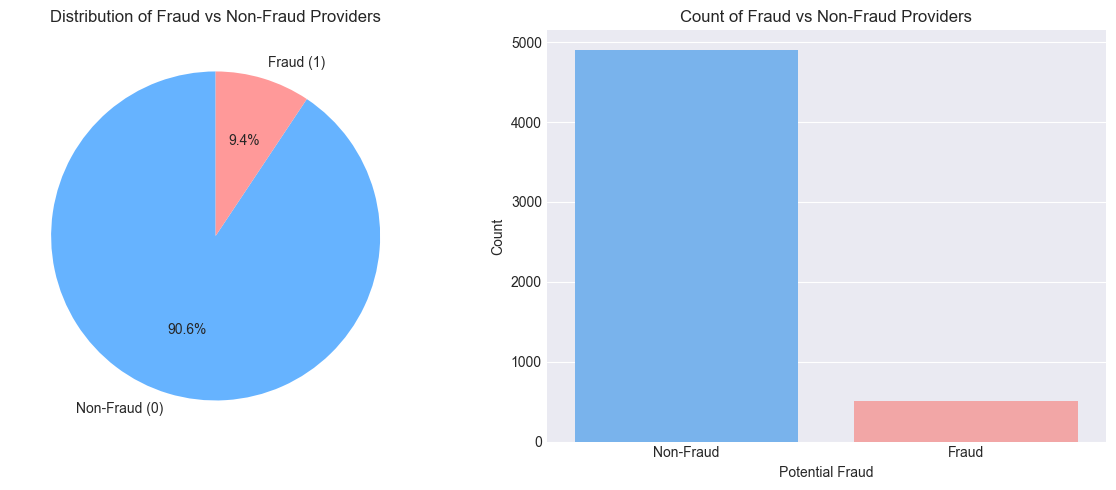

In [10]:
# Cell 9: Exploratory Data Analysis - Target Distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Pie chart
plt.subplot(1, 2, 1)
fraud_counts = provider_features['PotentialFraud'].value_counts()
colors = ['#66b3ff', '#ff9999']
plt.pie(fraud_counts.values, labels=['Non-Fraud (0)', 'Fraud (1)'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Fraud vs Non-Fraud Providers')

# Subplot 2: Bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=colors)
plt.title('Count of Fraud vs Non-Fraud Providers')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


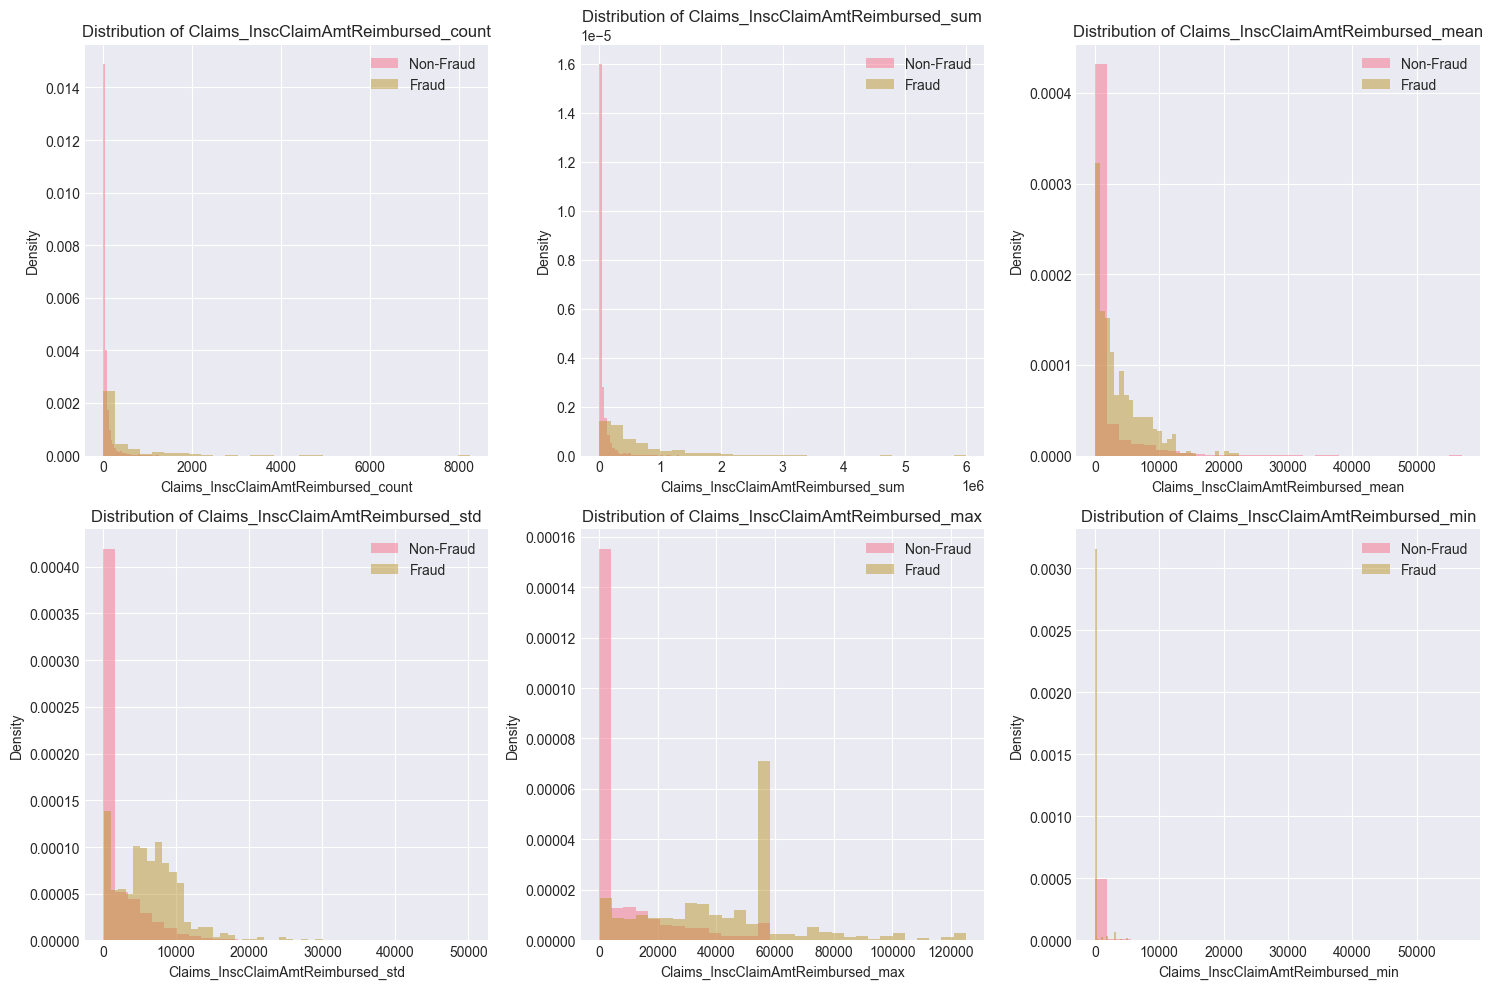

In [11]:
# Cell 10: EDA - Numerical Feature Distributions
numerical_features = provider_features.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [f for f in numerical_features if f != 'PotentialFraud'][:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, feature in enumerate(numerical_features):
    ax = axes[idx//3, idx%3]
    
    # Plot distributions for fraud vs non-fraud
    for fraud_status in [0, 1]:
        subset = provider_features[provider_features['PotentialFraud'] == fraud_status]
        ax.hist(subset[feature].dropna(), alpha=0.5, 
                label='Fraud' if fraud_status else 'Non-Fraud', 
                bins=30, density=True)
    
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

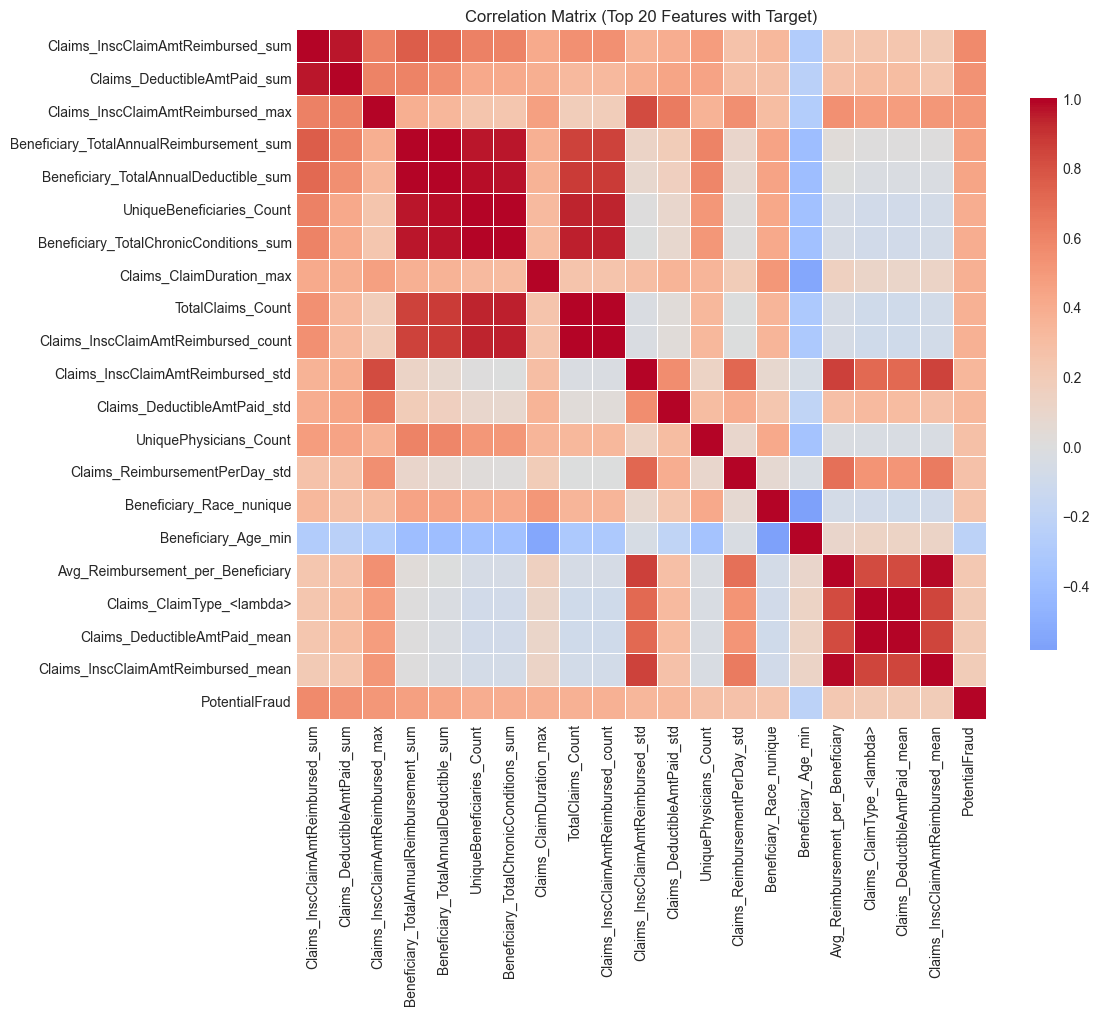

In [12]:
# Cell 11: EDA - Correlation Analysis
plt.figure(figsize=(12, 10))

# Select top 20 features by correlation with target
correlation_with_target = provider_features.select_dtypes(include=[np.number]).corr()['PotentialFraud'].abs().sort_values(ascending=False)
top_features = correlation_with_target[1:21].index.tolist()  # Exclude target itself

# Create correlation matrix for top features
corr_matrix = provider_features[top_features + ['PotentialFraud']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Top 20 Features with Target)')
plt.tight_layout()
plt.show()

In [13]:
# Cell 12: Handle Missing Values
print("Missing values before handling:")
missing_before = provider_features.isnull().sum()
print(missing_before[missing_before > 0])

# Create copy for cleaning
provider_features_clean = provider_features.copy()

# Strategy 1: Fill numerical missing values with median
numerical_cols = provider_features_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if provider_features_clean[col].isnull().sum() > 0:
        provider_features_clean[col] = provider_features_clean[col].fillna(provider_features_clean[col].median())

print("\nMissing values after handling:")
missing_after = provider_features_clean.isnull().sum()
print(missing_after[missing_after > 0])


Missing values before handling:
Claims_InscClaimAmtReimbursed_std         240
Claims_DeductibleAmtPaid_mean               1
Claims_DeductibleAmtPaid_std              245
Claims_ClaimDuration_std                  240
Claims_ReimbursementPerDay_std            240
Beneficiary_Age_std                       253
Beneficiary_TotalChronicConditions_std    253
dtype: int64

Missing values after handling:
Series([], dtype: int64)


In [14]:
# Cell 13: Save Processed Data
import os

# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save processed data
provider_features_clean.to_csv('../data/processed/provider_features_final.csv', index=False)

# Also save intermediate datasets for reference
beneficiary_processed.to_csv('../data/processed/beneficiary_processed.csv', index=False)
claims_combined.to_csv('../data/processed/claims_combined.csv', index=False)

print("Processed data saved successfully!")
print(f"Final dataset saved to: ../data/processed/provider_features_final.csv")
print(f"Shape: {provider_features_clean.shape}")
print(f"Columns: {len(provider_features_clean.columns)}")


Processed data saved successfully!
Final dataset saved to: ../data/processed/provider_features_final.csv
Shape: (5410, 40)
Columns: 40


In [15]:
# Cell 14: Summary Statistics
print("=== SUMMARY STATISTICS ===")
print(f"\n1. Dataset Overview:")
print(f"   - Total providers: {len(provider_features_clean)}")
print(f"   - Fraudulent providers: {provider_features_clean['PotentialFraud'].sum()} ({provider_features_clean['PotentialFraud'].mean():.2%})")
print(f"   - Features created: {len(provider_features_clean.columns) - 1}")

print(f"\n2. Key Metrics by Fraud Status:")
fraud_stats = provider_features_clean.groupby('PotentialFraud').agg({
    'Claims_InscClaimAmtReimbursed_sum': ['mean', 'std'],
    'Claims_InscClaimAmtReimbursed_count': ['mean', 'std'],
    'UniqueBeneficiaries_Count': ['mean', 'std'],
    'Beneficiary_TotalChronicConditions_mean': ['mean', 'std']
}).round(2)

display(fraud_stats)

print(f"\n3. Top 5 Features by Correlation with Fraud:")
correlation_with_target = provider_features_clean.select_dtypes(include=[np.number]).corr()['PotentialFraud'].abs().sort_values(ascending=False)
top_corr_features = correlation_with_target[1:6]  # Exclude target itself
for feature, corr in top_corr_features.items():
    print(f"   - {feature}: {corr:.3f}")

=== SUMMARY STATISTICS ===

1. Dataset Overview:
   - Total providers: 5410
   - Fraudulent providers: 506 (9.35%)
   - Features created: 39

2. Key Metrics by Fraud Status:


Claims_InscClaimAmtReimbursed_sum             \
                                            mean        std   
PotentialFraud                                                
0                                       53193.72  102342.35   
1                                      584350.04  644668.51   

               Claims_InscClaimAmtReimbursed_count          \
                                              mean     std   
PotentialFraud                                               
0                                            70.44  128.94   
1                                           420.55  722.73   

               UniqueBeneficiaries_Count          \
                                    mean     std   
PotentialFraud                                     
0                                  49.11   81.98   
1                                 242.02  345.26   

               Beneficiary_TotalChronicConditions_mean        
                                                  mean   std  
PotentialFraud                                                
0                                                17.59  0.91  
1                                                17.39  0.57


3. Top 5 Features by Correlation with Fraud:
   - Claims_InscClaimAmtReimbursed_sum: 0.576
   - Claims_DeductibleAmtPaid_sum: 0.532
   - Claims_InscClaimAmtReimbursed_max: 0.515
   - Beneficiary_TotalAnnualReimbursement_sum: 0.465
   - Beneficiary_TotalAnnualDeductible_sum: 0.439
